<a href="https://colab.research.google.com/github/tlima5/deep-learning/blob/main/datasetgray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
from keras.models import Model
from keras.layers import *
from keras.optimizers import *
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import csv
from sklearn.model_selection import train_test_split
from google.colab import files
from sklearn.utils import class_weight
import itertools
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!mkdir -p ~/.kaggle
!cp 'drive/My Drive/UFES/2019 2/Deep Learning/Trabalho/VM/kaggle.json' ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle
!ls -l ~/.kaggle
!cat ~/.kaggle/kaggle.json

kaggle.json
total 4
-rw------- 1 root root 63 Nov 29 00:22 kaggle.json
{"username":"tlima95","key":"085153f5cb87e0a0ed5a173568ceda83"}

In [ ]:
!kaggle competitions download -f train_images.zip -c aptos2019-blindness-detection
!kaggle competitions download -f train.csv -c aptos2019-blindness-detection

100% 8.01G/8.01G [01:23<00:00, 120MB/s] 
100% 8.01G/8.01G [01:23<00:00, 103MB/s]
  0% 0.00/53.7k [00:00<?, ?B/s]
100% 53.7k/53.7k [00:00<00:00, 47.3MB/s]


In [ ]:
!unzip train_images.zip -d train_images
!rm train_images.zip

Archive:  train_images.zip
  inflating: train_images/7b9d519cbd66.png  
  inflating: train_images/ae49cc60f251.png  
  inflating: train_images/b294927b14b0.png  
  inflating: train_images/f4d3777f2710.png  
  inflating: train_images/d74ccc796517.png  
  inflating: train_images/15bed5adde74.png  
  inflating: train_images/f002ce614c59.png  
  inflating: train_images/7335a2d43ada.png  
  inflating: train_images/9b7b6e4db1d5.png  
  inflating: train_images/1968183f0e61.png  
  inflating: train_images/d91273efb92a.png  
  inflating: train_images/5cf9127f251a.png  
  inflating: train_images/370f575adb23.png  
  inflating: train_images/4c17e85686f0.png  
  inflating: train_images/4f7755e74a9e.png  
  inflating: train_images/25e9fd872182.png  
  inflating: train_images/b64e1eef3d63.png  
  inflating: train_images/e7d2c2c3b30f.png  
  inflating: train_images/bfda2fd0533a.png  
  inflating: train_images/224bb938e2dd.png  
  inflating: train_images/d51e5d7484ea.png  
  inflating: train_images/dc

In [ ]:
!ls


drive	     train.csv	   train.zip.001  train.zip.003
sample_data  train_images  train.zip.002


In [ ]:
!sudo apt-get install imagemagick

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono ghostscript gsfonts
  imagemagick-6-common imagemagick-6.q16 libcupsfilters1 libcupsimage2
  libdjvulibre-text libdjvulibre21 libgs9 libgs9-common libijs-0.35
  libjbig2dec0 liblqr-1-0 libmagickcore-6.q16-3 libmagickcore-6.q16-3-extra
  libmagickwand-6.q16-3 libnetpbm10 libwmf0.2-7 netpbm poppler-data
Suggested packages:
  fonts-noto ghostscript-x imagemagick-doc autotrace cups-bsd | lpr | lprng
  enscript gimp gnuplot grads hp2xx html2ps libwmf-bin mplayer povray radiance
  sane-utils texlive-base-bin transfig ufraw-batch inkscape libjxr-tools
  libwmf0.2-7-gtk poppler-utils fonts-japanese-mincho | fonts-ipafont-mincho
  fonts-japanese-gothic | fonts-ipafont-goth

In [ ]:
!mogrify -format jpeg "train_images/*.png"

In [ ]:
!rm train_images/*.png

In [ ]:
!ls
#!ls "train_images"

drive  sample_data  train.csv  train_images


Segundo

In [ ]:
!kaggle competitions download -f train.zip.001 -c diabetic-retinopathy-detection
!kaggle competitions download -f train.zip.002 -c diabetic-retinopathy-detection
!kaggle competitions download -f train.zip.003 -c diabetic-retinopathy-detection
!kaggle competitions download -f train.zip.004 -c diabetic-retinopathy-detection
!kaggle competitions download -f train.zip.005 -c diabetic-retinopathy-detection
!kaggle competitions download -f trainLabels.csv.zip -c diabetic-retinopathy-detection

100% 7.81G/7.81G [02:10<00:00, 99.3MB/s]
100% 7.81G/7.81G [02:10<00:00, 64.2MB/s]
100% 7.81G/7.81G [02:09<00:00, 73.3MB/s]
100% 7.81G/7.81G [02:09<00:00, 64.6MB/s]
100% 7.81G/7.81G [01:28<00:00, 115MB/s]
100% 7.81G/7.81G [01:28<00:00, 94.8MB/s]
100% 7.81G/7.81G [02:07<00:00, 73.9MB/s]
100% 7.81G/7.81G [02:07<00:00, 65.8MB/s]
100% 1.33G/1.34G [00:27<00:00, 55.9MB/s]
100% 1.34G/1.34G [00:27<00:00, 51.2MB/s]
  0% 0.00/69.4k [00:00<?, ?B/s]
100% 69.4k/69.4k [00:00<00:00, 65.6MB/s]


In [ ]:
! cat train.zip.* > train_images.zip && zip -F train_images.zip --out train-full.zip
!rm train.zip.*

In [ ]:
!unzip train_images.zip
!rm train_images.zip
!rm train-full.zip

In [ ]:
!unzip trainLabels.csv.zip
!rm trainLabels.csv.zip

unzip:  cannot find or open trainLabels.csv.zip, trainLabels.csv.zip.zip or trainLabels.csv.zip.ZIP.
rm: cannot remove 'trainLabels.csv.zip': No such file or directory


In [ ]:
from sklearn.utils import shuffle

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('trainLabels.csv')
df.columns = ['imagem', 'nivel']
df2 = pd.read_csv('train.csv')
df2.columns = ['imagem', 'nivel']

In [ ]:
print(df)
print(df2)
df3 = df.append(df2)
print(df3)
df3 = df3.sample(frac=1)
print(df3)
df3.to_csv('train_image.csv')

            imagem  nivel
0          10_left      0
1         10_right      0
2          13_left      0
3         13_right      0
4          15_left      1
...            ...    ...
35121  44347_right      0
35122   44348_left      0
35123  44348_right      0
35124   44349_left      0
35125  44349_right      1

[35126 rows x 2 columns]
            imagem  nivel
0     000c1434d8d7      2
1     001639a390f0      4
2     0024cdab0c1e      1
3     002c21358ce6      0
4     005b95c28852      0
...            ...    ...
3657  ffa47f6a7bf4      2
3658  ffc04fed30e6      0
3659  ffcf7b45f213      2
3660  ffd97f8cd5aa      0
3661  ffec9a18a3ce      2

[3662 rows x 2 columns]
            imagem  nivel
0          10_left      0
1         10_right      0
2          13_left      0
3         13_right      0
4          15_left      1
...            ...    ...
3657  ffa47f6a7bf4      2
3658  ffc04fed30e6      0
3659  ffcf7b45f213      2
3660  ffd97f8cd5aa      0
3661  ffec9a18a3ce      2

[38788 rows 

In [ ]:
!ls

drive	     train	train_image.csv  trainLabels.csv
sample_data  train.csv	train_images


In [ ]:
l=[0,0,0,0,0]
arquivo = open('train_image.csv')
images = csv.DictReader(arquivo)
for image in images:
  dr = int(image["nivel"])
  l[dr]+=1
print("Nivel 0: "+str(l[0])+"\nNivel 1: "+str(l[1])+"\nNivel 2: "+str(l[2])+"\nNivel 3: "+str(l[3])+"\nNivel 4: "+str(l[4]))
print("A menor qtd é "+str(min(l)))
qtd=min(l)

Nivel 0: 27615
Nivel 1: 2813
Nivel 2: 6291
Nivel 3: 1066
Nivel 4: 1003
A menor qtd é 1003


In [ ]:
!mv train_images/* train

In [ ]:
l1=[0,0,0,0,0]
arquivo = open('train_image.csv')
images = csv.DictReader(arquivo)
x=[] #vetor de entrada
y=[] #vetor de saídas desejadas
y_wight=[] #vetor de pesos 
#for image in images:
img = image["imagem"]
dr = int(image["nivel"])
if(l1[dr] < qtd):
  aux=np.zeros(5)
  img = cv2.imread('train/'+img+'.jpeg', cv2.IMREAD_COLOR)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img = cv2.resize(img,(640,480))
  aux[dr]=1
  y_wight.append(dr)
  x.append(img)
  y.append(aux)
  l1[dr]+=1

print("train ok")
print(l1)

train ok
[0, 1, 0, 0, 0]


In [ ]:
y=np.asarray(y)
x=np.asarray(x)
y_wight=np.asarray(y_wight)
print(x.shape)
print(y.shape)
print(y_wight.shape)
print(x)
print(y)
print(y_wight)

(1, 480, 640)
(1, 5)
(1,)
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
[[0. 1. 0. 0. 0.]]
[1]


1
[0. 1. 0. 0. 0.]


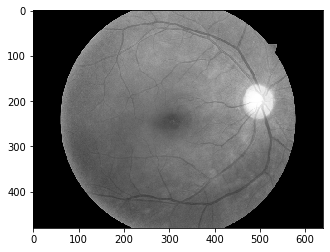

In [ ]:
index=0
cont=0
for teste in y:
  if teste[4]==1:
    if cont>500:
      break;
  cont+=1
print(cont)
index=cont
plt.imshow(x[0],cmap='gray')
print(y[0])

In [ ]:
print(x.shape)
x0,x1,x2,x3,x4=np.split(x,5)
print(x0.shape)
print(x1.shape)
print(x2.shape)
print(x3.shape)
print(x4.shape)


(5015, 480, 640, 3)
(1003, 480, 640, 3)
(1003, 480, 640, 3)
(1003, 480, 640, 3)
(1003, 480, 640, 3)
(1003, 480, 640, 3)


In [ ]:
!ls

drive	     train	train_image.csv  trainLabels.csv
sample_data  train.csv	train_images


In [ ]:
import pickle
pickle.dump(y, open('ycolor.pkl', 'wb'))
pickle.dump(x0, open('x0color.pkl', 'wb'))
pickle.dump(x1, open('x1color.pkl', 'wb'))
pickle.dump(x2, open('x2color.pkl', 'wb'))
pickle.dump(x3, open('x3color.pkl', 'wb'))
pickle.dump(x4, open('x4color.pkl', 'wb'))
pickle.dump(y_wight, open('ywcolor.pkl', 'wb'))
yr = pickle.load(open('ycolor.pkl','rb'))
xr0 = pickle.load(open('x0color.pkl','rb'))
xr1 = pickle.load(open('x1color.pkl','rb'))
xr2 = pickle.load(open('x2color.pkl','rb'))
xr3 = pickle.load(open('x3color.pkl','rb'))
xr4 = pickle.load(open('x4color.pkl','rb'))
ywr = pickle.load(open('ywcolor.pkl','rb'))

In [ ]:
!ls -l

total 4516620
drwx------ 3 root root      4096 Nov 28 21:30 drive
drwxr-xr-x 1 root root      4096 Nov 21 16:30 sample_data
drwxr-xr-x 2 root root   1363968 Nov 28 22:44 train
-rw-r--r-- 1 root root     54948 Nov 28 21:31 train.csv
-rw-r--r-- 1 root root    737095 Nov 28 22:40 train_image.csv
drwxr-xr-x 2 root root    274432 Nov 28 22:44 train_images
-rw-r--r-- 1 root root    465317 Feb  6  2015 trainLabels.csv
-rw-r--r-- 1 root root 924364968 Nov 28 23:42 x0color.pkl
-rw-r--r-- 1 root root 924364968 Nov 28 23:42 x1color.pkl
-rw-r--r-- 1 root root 924364968 Nov 28 23:42 x2color.pkl
-rw-r--r-- 1 root root 924364968 Nov 28 23:42 x3color.pkl
-rw-r--r-- 1 root root 924364968 Nov 28 23:42 x4color.pkl
-rw-r--r-- 1 root root    200761 Nov 28 23:42 ycolor.pkl
-rw-r--r-- 1 root root     40279 Nov 28 23:42 ywcolor.pkl


In [ ]:
print(xr0.shape)
print(xr1.shape)
print(xr2.shape)
print(xr3.shape)
print(xr4.shape)
print(yr.shape)
print(ywr.shape)

(1003, 480, 640, 3)
(1003, 480, 640, 3)
(1003, 480, 640, 3)
(1003, 480, 640, 3)
(1003, 480, 640, 3)
(5015, 5)
(5015,)


In [ ]:
print(x0==xr0)
print(x1==xr1)
print(x2==xr2)
print(x3==xr3)
print(x4==xr4)
print(y==yr)
print(y_wight==ywr)

In [ ]:
teste=np.concatenate((xr0,xr1,xr2,xr3,xr4))
print(teste.shape)
print(teste==x)

In [ ]:
!ls

drive	     train.csv	      trainLabels.csv  x2color.pkl  ycolor.pkl
sample_data  train_image.csv  x0color.pkl      x3color.pkl  ywcolor.pkl
train	     train_images     x1color.pkl      x4color.pkl


In [ ]:
!cp *.pkl 'drive/My Drive/UFES/2019 2/Deep Learning/Trabalho/VM'

In [ ]:
!cp y.pkl 'drive/My Drive/UFES/2019 2/Deep Learning/Trabalho/VM'
!cp y_weight.pkl 'drive/My Drive/UFES/2019 2/Deep Learning/Trabalho/VM'